In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

data = pd.read_csv('data.csv')
n = len(data)
num_plays = data['play_id']

0         28.72
1         24.75
2         20.97
3         26.41
4        -19.41
          ...  
116291    20.93
116292   -37.27
116293   -34.10
116294    14.16
116295    13.56
Name: player_x, Length: 116296, dtype: float64
0        -19.61
1         -9.47
2        -11.14
3        -18.99
4         19.95
          ...  
116291    -2.87
116292    -9.87
116293   -11.99
116294    18.58
116295     7.91
Name: player_y, Length: 116296, dtype: float64


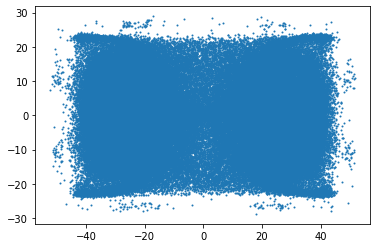

In [2]:
print(data['player_x'])
print(data['player_y'])
plt.scatter(data['player_x'], data['player_y'], marker='o', s=1)
plt.show()

In [3]:
play_types = data['play_type'].unique().ravel()
play_type_dict = {value: index for index, value in enumerate(play_types)}
num_plays = len(play_types)
subsequent_play = np.zeros((num_plays, num_plays))

current_play_num = 0
for i in range(n):
    current_play = data['play_type'][i]
    if current_play_num == data['play_id'][i]:
        continue
    elif data['play_id'][i] == 1:
        current_play_num = 1
    else:
        previous_play = data['play_type'][i-1]
        current_play_num += data['play_id'][i]-data['play_id'][i-1]
        subsequent_play[play_type_dict[previous_play]][play_type_dict[current_play]] += 1

for i in range(len(subsequent_play)):
    total = subsequent_play[i].sum()
    for j in range(len(subsequent_play[i])):
        
        subsequent_play[i][j] = subsequent_play[i][j] / total * 100

['DHO', 'Iso', 'Ball Screen', 'Initiation', 'Closeout', 'Off-Cut', 'Off-Move', 'Post', 'Backcourt', 'Transition', 'Rim Gather', 'Short Roll', 'Paint Gather', 'Fake DHO', 'Perim Gather', 'Mid Gather', 'Downhill', 'Inbounds'] [15.87354409 10.78202995 21.79700499  6.38935108 16.93843594  5.22462562
  3.19467554  3.52745424  0.3327787   3.76039933  2.32945092  1.63061564
  1.16472546  0.49916805  3.26123128  2.2296173   0.83194676  0.23294509]


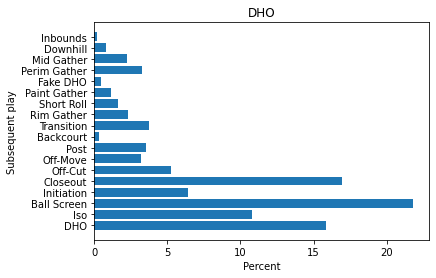

['DHO', 'Iso', 'Ball Screen', 'Initiation', 'Closeout', 'Off-Cut', 'Off-Move', 'Post', 'Backcourt', 'Transition', 'Rim Gather', 'Short Roll', 'Paint Gather', 'Fake DHO', 'Perim Gather', 'Mid Gather', 'Downhill', 'Inbounds'] [ 6.38820639 12.40786241 26.97788698  7.66584767 17.24815725  3.19410319
  3.61179361  3.34152334  0.56511057  4.66830467  3.56265356  0.04914005
  1.67076167  0.34398034  4.98771499  2.01474201  0.63882064  0.66339066]


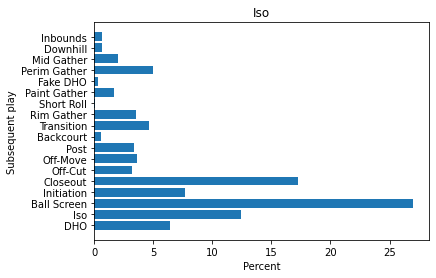

['DHO', 'Iso', 'Ball Screen', 'Initiation', 'Closeout', 'Off-Cut', 'Off-Move', 'Post', 'Backcourt', 'Transition', 'Rim Gather', 'Short Roll', 'Paint Gather', 'Fake DHO', 'Perim Gather', 'Mid Gather', 'Downhill', 'Inbounds'] [ 5.36900859 12.77575972 27.75759724  4.95260034 19.27881634  5.8474351
  5.08549659  3.46416231  0.29237176  2.8794188   2.10862054  2.6313458
  0.96571277  0.41640826  3.62363781  1.50615753  0.51386551  0.53158501]


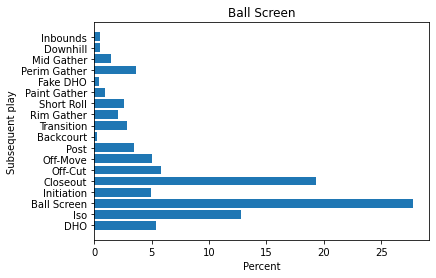

['DHO', 'Iso', 'Ball Screen', 'Initiation', 'Closeout', 'Off-Cut', 'Off-Move', 'Post', 'Backcourt', 'Transition', 'Rim Gather', 'Short Roll', 'Paint Gather', 'Fake DHO', 'Perim Gather', 'Mid Gather', 'Downhill', 'Inbounds'] [ 5.85628363  4.33681545 15.32130421  9.84488762 21.36752137  5.85628363
  7.02754036  2.2158911   0.41152263  3.07059196  2.05761317  0.03165559
  0.82304527  0.18993352  3.54542577  1.51946819 15.95441595  0.56980057]


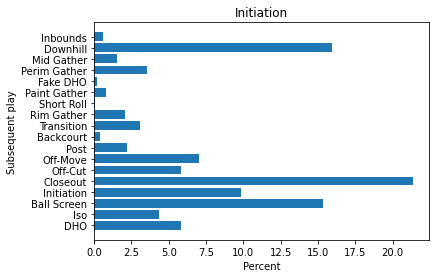

['DHO', 'Iso', 'Ball Screen', 'Initiation', 'Closeout', 'Off-Cut', 'Off-Move', 'Post', 'Backcourt', 'Transition', 'Rim Gather', 'Short Roll', 'Paint Gather', 'Fake DHO', 'Perim Gather', 'Mid Gather', 'Downhill', 'Inbounds'] [ 6.04682126  7.73327416 25.04160657  8.31021857 27.12748253  2.30777765
  2.71829579  3.50604682  0.47708865  2.87362698  3.04005326  0.05547542
  1.81959392  0.48818373  4.48241429  2.72939088  0.78775103  0.45489848]


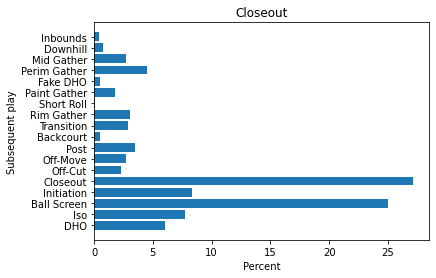

['DHO', 'Iso', 'Ball Screen', 'Initiation', 'Closeout', 'Off-Cut', 'Off-Move', 'Post', 'Backcourt', 'Transition', 'Rim Gather', 'Short Roll', 'Paint Gather', 'Fake DHO', 'Perim Gather', 'Mid Gather', 'Downhill', 'Inbounds'] [ 7.54635619  6.16645106 33.33333333  9.22811557 11.47046141  7.93445451
  3.27727469  2.50107805  0.56058646  3.40664079  3.32039672  0.
  1.4661492   0.77619664  5.17464424  2.32858991  0.64683053  0.86244071]


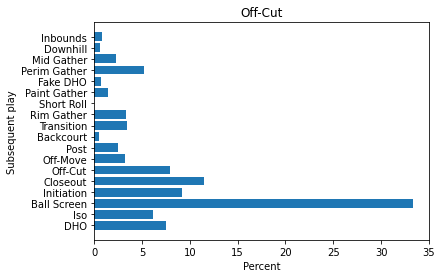

['DHO', 'Iso', 'Ball Screen', 'Initiation', 'Closeout', 'Off-Cut', 'Off-Move', 'Post', 'Backcourt', 'Transition', 'Rim Gather', 'Short Roll', 'Paint Gather', 'Fake DHO', 'Perim Gather', 'Mid Gather', 'Downhill', 'Inbounds'] [ 6.49404028  8.63131936 27.41471434  8.17920263 14.13892314  3.69913687
 10.19317715  3.1648171   0.24660912  3.82244143  2.58939581  0.24660912
  1.80846691  0.36991369  5.09658857  2.58939581  0.73982737  0.57542129]


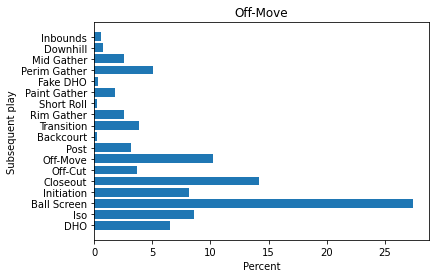

['DHO', 'Iso', 'Ball Screen', 'Initiation', 'Closeout', 'Off-Cut', 'Off-Move', 'Post', 'Backcourt', 'Transition', 'Rim Gather', 'Short Roll', 'Paint Gather', 'Fake DHO', 'Perim Gather', 'Mid Gather', 'Downhill', 'Inbounds'] [ 5.52560647  7.21024259 26.41509434  9.50134771 20.28301887  5.1212938
  3.63881402  6.06469003  0.20215633  3.1671159   3.36927224  0.13477089
  1.01078167  0.26954178  4.44743935  1.9541779   0.80862534  0.87601078]


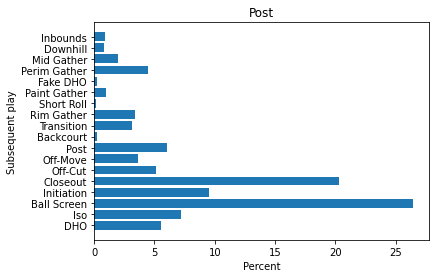

['DHO', 'Iso', 'Ball Screen', 'Initiation', 'Closeout', 'Off-Cut', 'Off-Move', 'Post', 'Backcourt', 'Transition', 'Rim Gather', 'Short Roll', 'Paint Gather', 'Fake DHO', 'Perim Gather', 'Mid Gather', 'Downhill', 'Inbounds'] [ 0.58479532  5.26315789 15.20467836  7.01754386  5.84795322  4.67836257
  4.67836257  4.09356725  4.09356725 19.88304094  1.75438596  0.
  0.          1.16959064  7.01754386  5.26315789 13.4502924   0.        ]


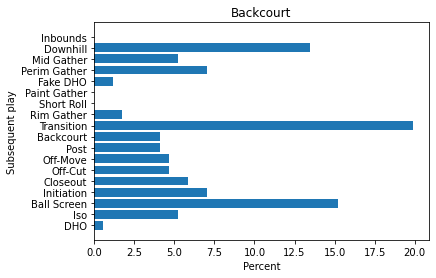

['DHO', 'Iso', 'Ball Screen', 'Initiation', 'Closeout', 'Off-Cut', 'Off-Move', 'Post', 'Backcourt', 'Transition', 'Rim Gather', 'Short Roll', 'Paint Gather', 'Fake DHO', 'Perim Gather', 'Mid Gather', 'Downhill', 'Inbounds'] [ 5.46751189  4.23930269 20.80031696  5.9429477   4.08082409  1.50554675
  2.49603803  1.18858954  0.67353407 40.92709984  2.65451664  0.15847861
  0.47543582  0.27733756  3.80348653  1.86212361  2.57527734  0.87163233]


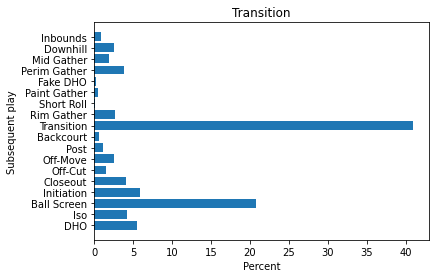

['DHO', 'Iso', 'Ball Screen', 'Initiation', 'Closeout', 'Off-Cut', 'Off-Move', 'Post', 'Backcourt', 'Transition', 'Rim Gather', 'Short Roll', 'Paint Gather', 'Fake DHO', 'Perim Gather', 'Mid Gather', 'Downhill', 'Inbounds'] [ 7.14285714  8.07453416 37.88819876 11.25776398  6.98757764  1.24223602
  2.2515528   1.86335404  0.77639752  3.18322981  7.29813665  0.
  1.39751553  0.31055901  6.21118012  2.4068323   1.00931677  0.69875776]


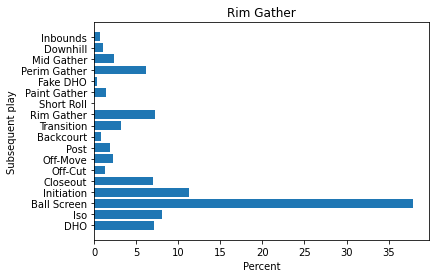

['DHO', 'Iso', 'Ball Screen', 'Initiation', 'Closeout', 'Off-Cut', 'Off-Move', 'Post', 'Backcourt', 'Transition', 'Rim Gather', 'Short Roll', 'Paint Gather', 'Fake DHO', 'Perim Gather', 'Mid Gather', 'Downhill', 'Inbounds'] [ 5.71428571  3.0952381  20.23809524  5.23809524 32.61904762  6.19047619
  2.14285714  1.66666667  0.23809524  2.85714286  2.61904762  5.71428571
  1.9047619   0.          5.          2.38095238  1.42857143  0.95238095]


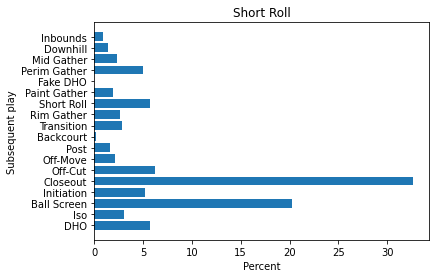

['DHO', 'Iso', 'Ball Screen', 'Initiation', 'Closeout', 'Off-Cut', 'Off-Move', 'Post', 'Backcourt', 'Transition', 'Rim Gather', 'Short Roll', 'Paint Gather', 'Fake DHO', 'Perim Gather', 'Mid Gather', 'Downhill', 'Inbounds'] [ 5.20504732  5.04731861 27.12933754  6.94006309 23.34384858  3.62776025
  4.41640379  1.57728707  0.47318612  2.99684543  3.94321767  0.
  6.62460568  0.47318612  5.67823344  0.63091483  0.78864353  1.10410095]


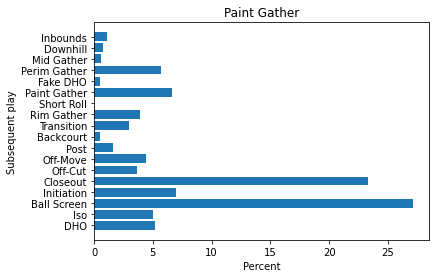

['DHO', 'Iso', 'Ball Screen', 'Initiation', 'Closeout', 'Off-Cut', 'Off-Move', 'Post', 'Backcourt', 'Transition', 'Rim Gather', 'Short Roll', 'Paint Gather', 'Fake DHO', 'Perim Gather', 'Mid Gather', 'Downhill', 'Inbounds'] [10.55276382  6.03015075 27.13567839  8.54271357 13.06532663  6.03015075
  3.51758794  4.0201005   1.00502513  2.51256281  6.03015075  0.
  0.50251256  5.02512563  3.51758794  1.50753769  1.00502513  0.        ]


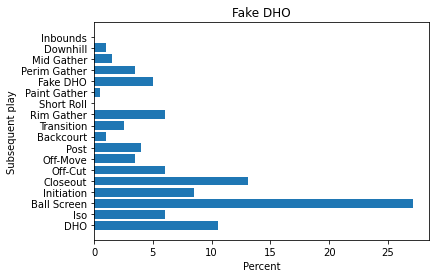

['DHO', 'Iso', 'Ball Screen', 'Initiation', 'Closeout', 'Off-Cut', 'Off-Move', 'Post', 'Backcourt', 'Transition', 'Rim Gather', 'Short Roll', 'Paint Gather', 'Fake DHO', 'Perim Gather', 'Mid Gather', 'Downhill', 'Inbounds'] [ 4.27029564  4.69263257 12.95166588  4.9272642  20.27217269  8.9629282
 17.97278273  3.98873768  0.23463163  4.22336931  1.4547161   0.04692633
  1.03237916  0.32848428  9.66682309  2.72172689  1.50164242  0.75082121]


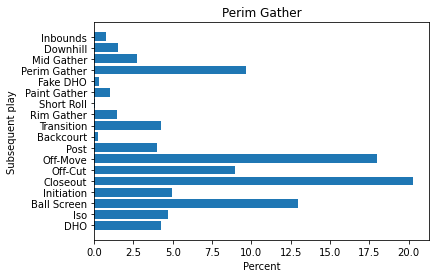

['DHO', 'Iso', 'Ball Screen', 'Initiation', 'Closeout', 'Off-Cut', 'Off-Move', 'Post', 'Backcourt', 'Transition', 'Rim Gather', 'Short Roll', 'Paint Gather', 'Fake DHO', 'Perim Gather', 'Mid Gather', 'Downhill', 'Inbounds'] [ 6.67330677  3.187251   14.54183267  4.6812749  24.30278884 14.14342629
  8.86454183  2.39043825  0.29880478  3.68525896  1.99203187  0.
  1.89243028  0.49800797  4.38247012  6.87250996  1.19521912  0.39840637]


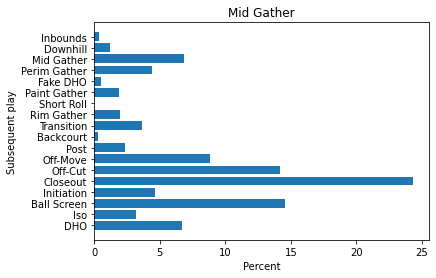

['DHO', 'Iso', 'Ball Screen', 'Initiation', 'Closeout', 'Off-Cut', 'Off-Move', 'Post', 'Backcourt', 'Transition', 'Rim Gather', 'Short Roll', 'Paint Gather', 'Fake DHO', 'Perim Gather', 'Mid Gather', 'Downhill', 'Inbounds'] [ 5.54435484  6.95564516 20.96774194  8.46774194 19.25403226  5.34274194
  3.72983871  2.41935484  0.50403226  3.42741935  3.93145161  0.
  1.31048387  0.60483871  4.63709677  1.61290323 10.28225806  1.00806452]


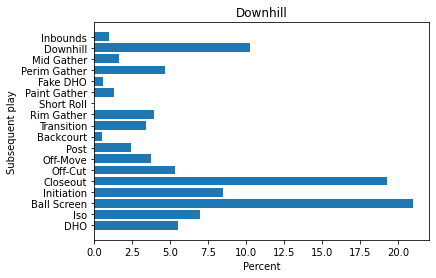

['DHO', 'Iso', 'Ball Screen', 'Initiation', 'Closeout', 'Off-Cut', 'Off-Move', 'Post', 'Backcourt', 'Transition', 'Rim Gather', 'Short Roll', 'Paint Gather', 'Fake DHO', 'Perim Gather', 'Mid Gather', 'Downhill', 'Inbounds'] [ 1.46520147  2.1978022   6.95970696  5.12820513  6.95970696 15.75091575
 28.57142857  1.0989011   1.0989011  11.35531136  2.1978022   0.
  1.83150183  0.36630037  5.12820513  3.66300366  1.83150183  4.3956044 ]


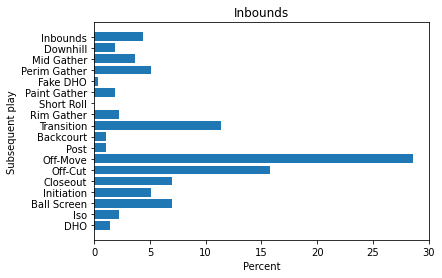

In [4]:
play_type_dict = {index: value for index, value in enumerate(play_types)}

for i in range(len(subsequent_play)):
    print(list(play_type_dict.values()), subsequent_play[i])
    plt.barh(list(play_type_dict.values()), subsequent_play[i])
    plt.title(play_type_dict[i])
    plt.xlabel("Percent")
    plt.ylabel("Subsequent play")
    plt.show()



In [19]:
result_types = data['result_type'].unique()
num_results = len(result_types)
result_type_dict = {value: index for index, value in enumerate(result_types)}
sequences = {}
current_sequence = []
current_play_id = 0
current_sequence_id = data['sequence_id'][0]
i = 0

while i < n:
    if current_sequence_id == data['sequence_id'][i]:
        if current_play_id == data['play_id'][i]:
            current_sequence.append(data['play_type'][i])
            current_play_id += 1
            i += 1
        elif current_play_id < data['play_id'][i]:
            current_play_id = data['play_id'][i]
        else:
            i += 1
    else:
        sequence = tuple(current_sequence)
        result = data['result_type'][i-1]
        result_pts = data['result_pts'][i-1]
        if  pd.isnull(result_pts):
            result_pts = 0
        if sequence in sequences:
            sequences[sequence][result_type_dict[result]] += 1
            sequences[sequence][-2] += result_pts
        else:
            sequences[sequence] = np.zeros(num_results+2)
            sequences[sequence][result_type_dict[result]] += 1
            sequences[sequence][-2] += result_pts
        current_sequence = []
        current_sequence_id = data['sequence_id'][i]
        current_play_id = data['play_id'][i]

In [20]:
sequence_list = list(sequences.keys())
num_sequences = len(sequence_list)
for i in range(num_sequences):
    total = sequences[sequence_list[i]][:-2].sum()
    sequences[sequence_list[i]][-1] = total
    sequences[sequence_list[i]][-2] = sequences[sequence_list[i]][-2] / total
    for j in range(num_results):
        sequences[sequence_list[i]][j] = sequences[sequence_list[i]][j] / total * 100



0.5990566037735849
1272.0


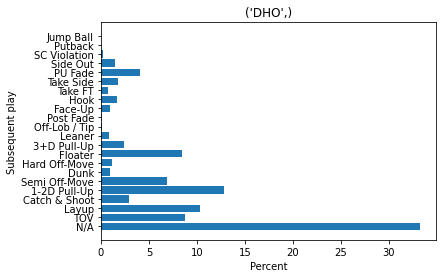

0.7828539199097575
1773.0


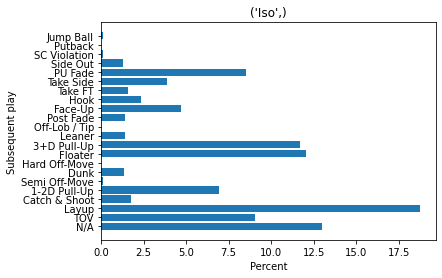

0.5483039079547709
5041.0


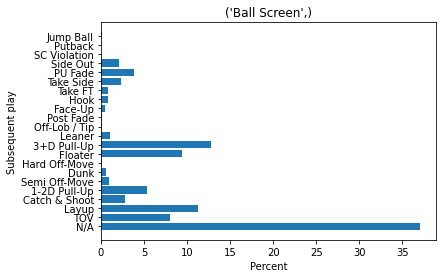

0.6001410437235543
1418.0


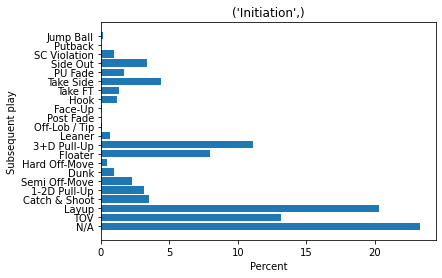

0.7512520868113522
1198.0


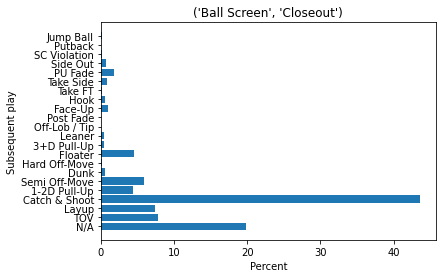

1.2592592592592593
135.0


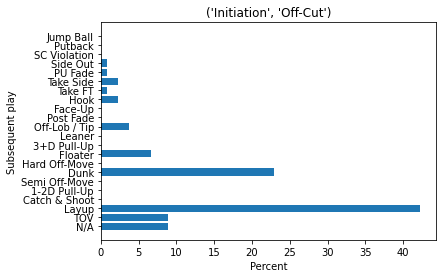

0.5311004784688995
418.0


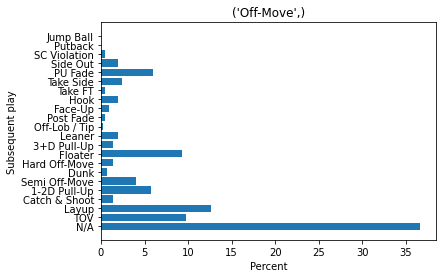

0.7859007832898173
383.0


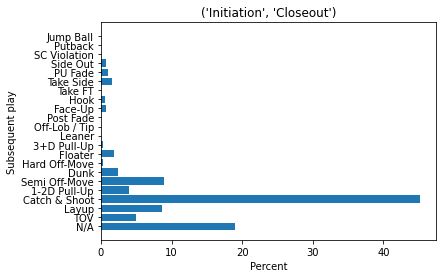

0.8832417582417582
728.0


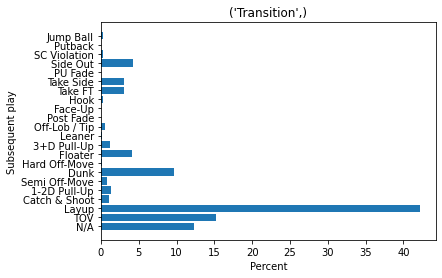

0.5222222222222223
270.0


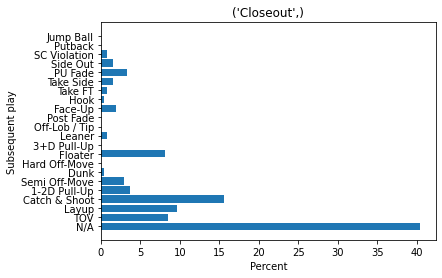

1.2191780821917808
803.0


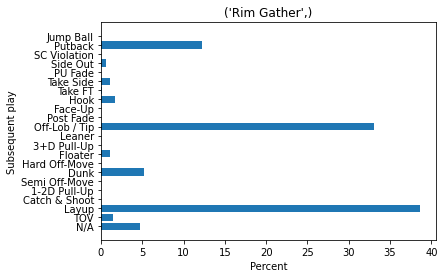

0.8161764705882353
136.0


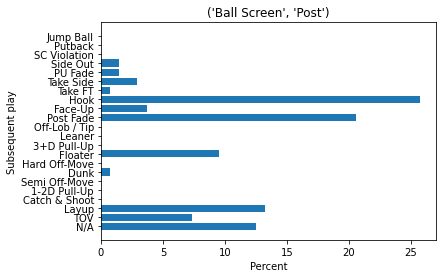

1.184265010351967
483.0


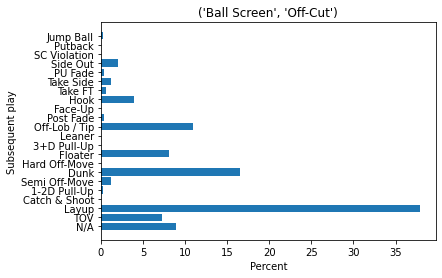

0.25210084033613445
119.0


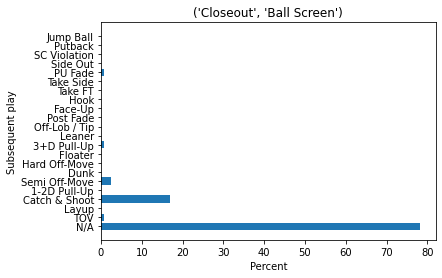

0.6867924528301886
265.0


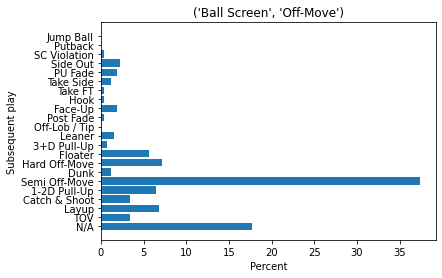

0.7520661157024794
121.0


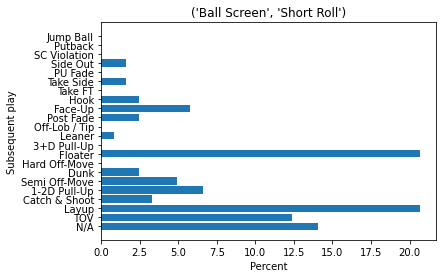

0.9074889867841409
227.0


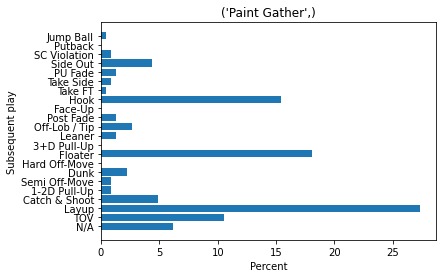

0.788235294117647
255.0


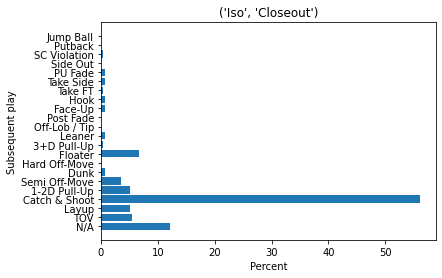

0.5066666666666667
150.0


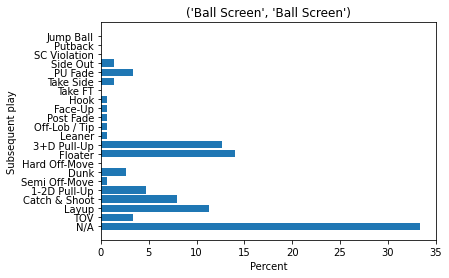

0.2890625
512.0


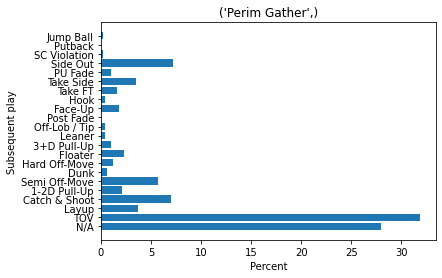

0.7512116316639742
619.0


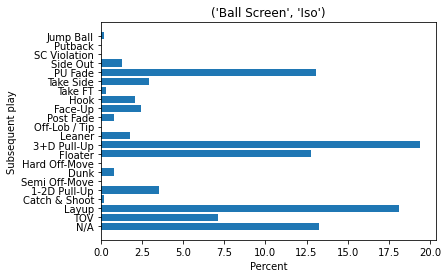

0.7407407407407407
540.0


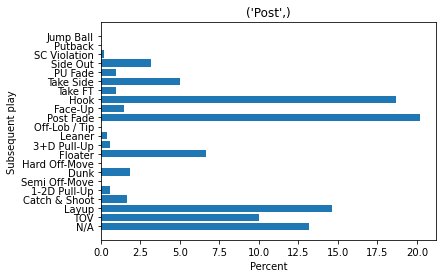

1.1193415637860082
243.0


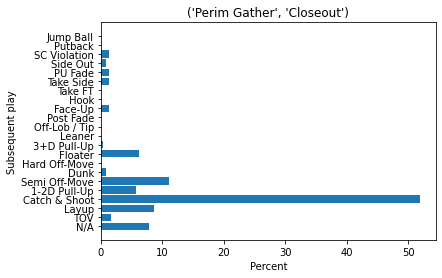

0.9358490566037736
265.0


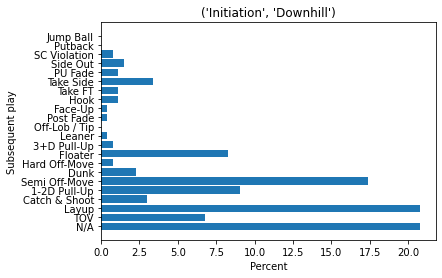

1.127579737335835
533.0


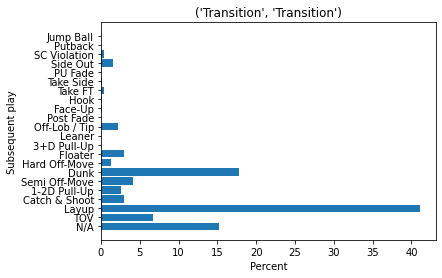

1.3333333333333333
126.0


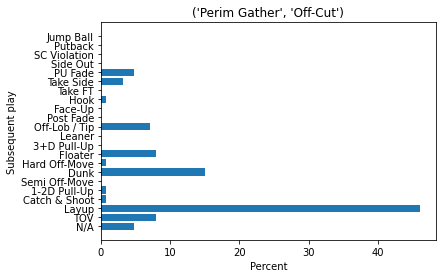

0.23008849557522124
113.0


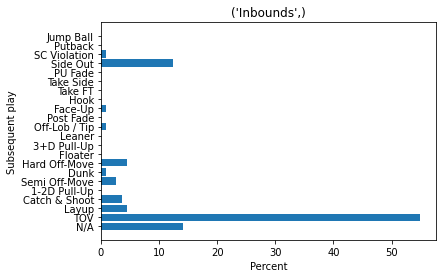

0.9126984126984127
252.0


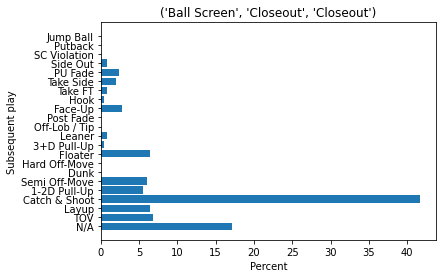

0.851145038167939
262.0


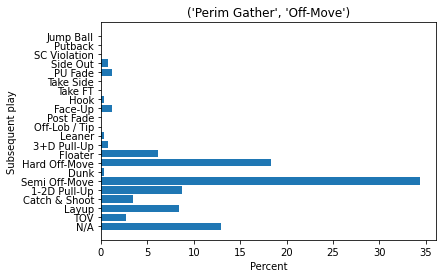

0.4249084249084249
273.0


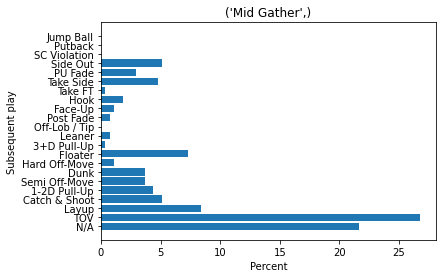

0.7721518987341772
237.0


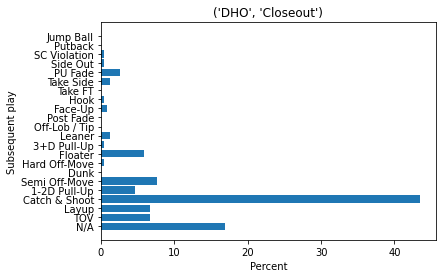

0.6521739130434783
115.0


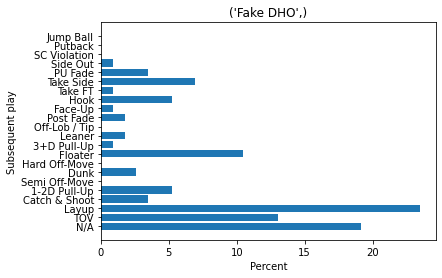

0.15748031496062992
127.0


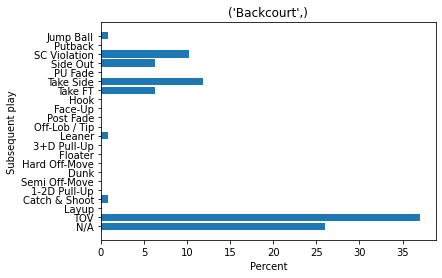

0.594059405940594
101.0


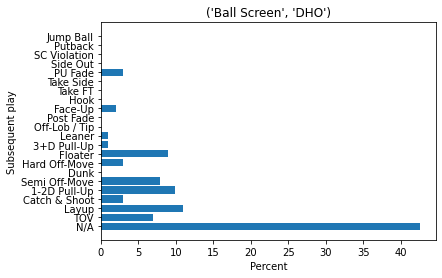

0.5038759689922481
129.0


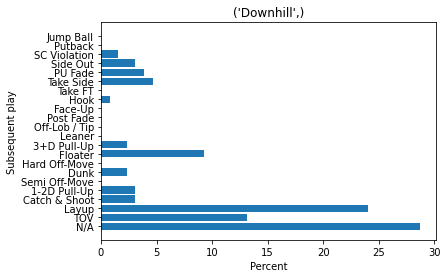

1.3942307692307692
104.0


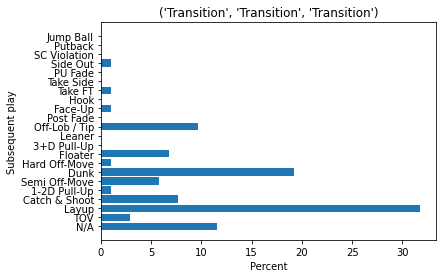

0.7522123893805309
113.0


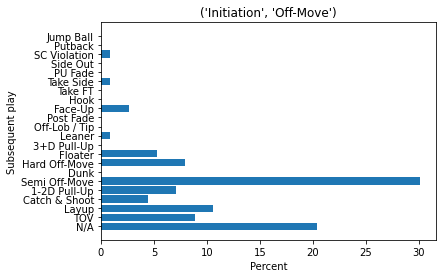

1.1869158878504673
107.0


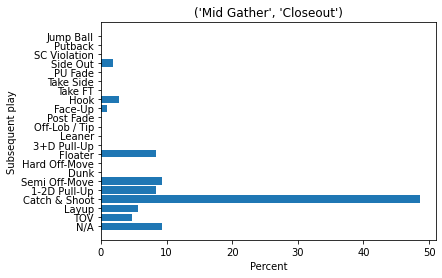

In [21]:
result_type_dict = {index: value for index, value in enumerate(result_types)}
result_type_dict[0] = "N/A"

for i in range(len(sequence_list)):
    if sequences[sequence_list[i]][-1] < 100:
        continue
    print(sequences[sequence_list[i]][-2])
    print(sequences[sequence_list[i]][-1])
    plt.barh(list(result_type_dict.values()), sequences[sequence_list[i]][:-2])
    plt.title(sequence_list[i])
    plt.xlabel("Percent")
    plt.ylabel("Subsequent play")
    plt.show()